Retrieve data from World Health Organization

In [58]:
import requests

url = "https://ghoapi.azureedge.net/api/HIV_0000000001"

response = requests.get(url)

data = response.json()

countries = []
years = []
rates = []

for item in data['value']:
    countries.append(item['SpatialDim'])
    years.append(item['TimeDim'])
    rates.append(item['NumericValue'])

Create DataFrame with Arrays

In [59]:
import pandas as pd

data = {'Country':countries, 'Year':years, 'Rate': rates}

df = pd.DataFrame(data)

to_remove = ['GLOBAL','SEAR','AMR','EUR','EMR','AFR','WPR','PAHO']

initial_df = df[~df['Country'].isin(to_remove)]

print(initial_df)

     Country  Year       Rate
224      AFG  2021    11000.0
225      ALB  2021     1400.0
226      DZA  2021    21000.0
227      AND  2021        NaN
228      AGO  2021   320000.0
...      ...   ...        ...
4487     VEN  2000    50000.0
4488     VNM  2000   120000.0
4489     YEM  2000     2200.0
4490     ZMB  2000   880000.0
4491     ZWE  2000  1600000.0

[4268 rows x 3 columns]


In [60]:
grouped_df = initial_df.groupby(['Year']).sum()
print(grouped_df)

            Rate
Year            
2000  23772960.0
2001  24352160.0
2002  24571260.0
2003  25032450.0
2004  25082750.0
2005  25226180.0
2006  25312610.0
2007  25635400.0
2008  25911950.0
2009  26215230.0
2010  27700730.0
2011  28284160.0
2012  28654960.0
2013  29239910.0
2014  29821930.0
2015  30321030.0
2016  30787530.0
2017  31139070.0
2018  31690060.0
2019  32205270.0
2020  31286860.0
2021  31431460.0


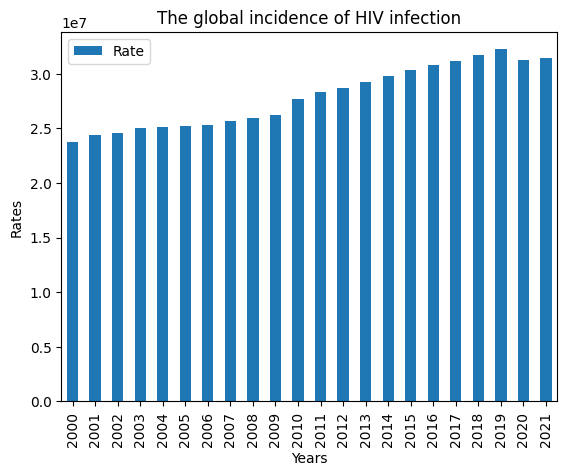

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

new_df = grouped_df.reset_index()

new_df.plot(kind='bar',x='Year',y='Rate')

plt.xlabel('Years')
plt.ylabel('Rates')
plt.title('The global incidence of HIV infection')
plt.show()

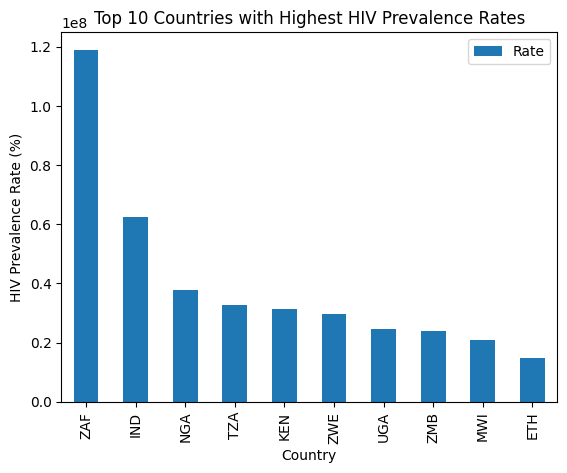

In [62]:
grouped_df = initial_df.groupby('Country').sum().sort_values(by='Rate', ascending=False)
top_10 = grouped_df.nlargest(10,'Rate')
top_10['Country'] = top_10.index

top_10.plot(kind='bar', x='Country', y='Rate')
plt.xlabel('Country')
plt.ylabel('HIV Prevalence Rate (%)')
plt.title('Top 10 Countries with Highest HIV Prevalence Rates')

plt.show()